### Import the libraries

In [1]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import numpy as np

### Read in and display the image

This image is:  <class 'numpy.ndarray'>
(514, 816, 3)


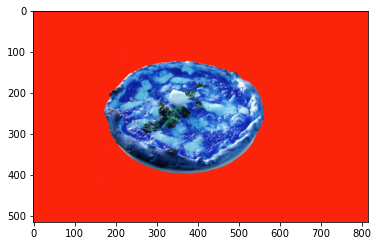

In [2]:
#read in the image:
image = cv2.imread('images/pizza_bluescreen.jpg')

#print out the type of image and its dimension
print('This image is: ', type(image))
print(image.shape)
plt.imshow(image)

### Convert the image from BGR to RGB

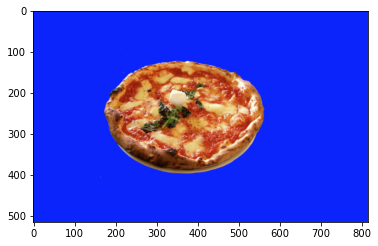

In [3]:
#Make a copy of the image
image_copy = np.copy(image)

#covert the copy of image from BGR to RGB
image_copy = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_copy)

### Define the color threshold

In [4]:
#define our color selection bounderies in RGB values
lower_blue = np.array([0,0,220])
upper_blue = np.array([50, 70, 255])

### Create a mask

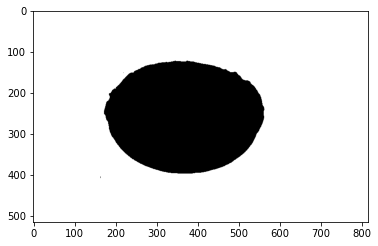

In [5]:
#creat a mask separate the shape of th object with the background
mask = cv2.inRange(image_copy, lower_blue, upper_blue)
plt.imshow(mask, cmap='gray')

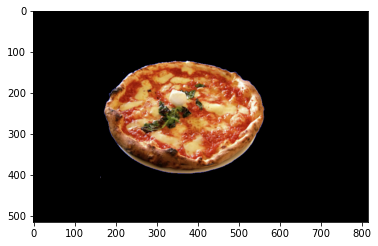

In [6]:
# apply the mask to the image
masked_image = np.copy(image_copy)
masked_image[mask!=0] = [0,0,0]
plt.imshow(masked_image)

### Background

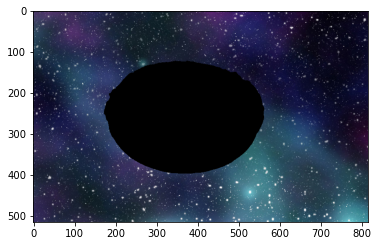

In [7]:
# load in the background
image2 = plt.imread('images/space_background.jpg')
image2_copy = np.copy(image2)

# crop the size of the background to fit with the size of the upper image
crop_background = image2_copy[0:514, 0:816]

# apply the mask to background
crop_background[mask==0] =[0,0,0]

plt.imshow(crop_background)

### The final picture

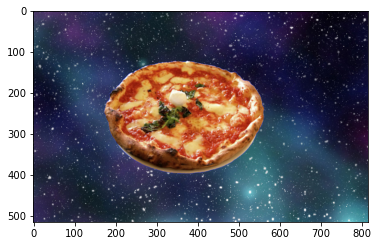

In [8]:
# combine the masked picture with the croped background
pizza = crop_background + masked_image
plt.imshow(pizza)